# Predicting heart disease using machine learning

This notebook looks into using various ML and Data Science libraries in an attempt to build a machine learning model capable of predicting whether or not a patient has heart disease based on their medical attributes.

The further steps are the following:
1. Problem defenition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a pacient, we predict whether or not they have heart disease.

## 2. Data

The original data came from the Cleavland database from the UCI Machine Learning Repository - http://archive.ics.uci.edu/ml/datasets/Heart+Disease. There is also a version of it available on Kaggle - https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a pacient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

Information about each of the features in the data is the following:

* **age:** age in years
* **sex:** sex (1 = male, 0 = female)
* **cp:** chest pain type:
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
* **chol:** serum cholestoral in mg/dl
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
* **restecg:** resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **exang:** exercise induced angina (1 = yes, 0 = no)
* **oldpeak** = ST depression induced by exercise relative to rest
* **slope:** the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
* **ca:** number of major vessels (0-3) colored by flourosopy
* **thal:** 3 = normal, 6 = fixed defect, 7 = reversable defect
* **num:** diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [141]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

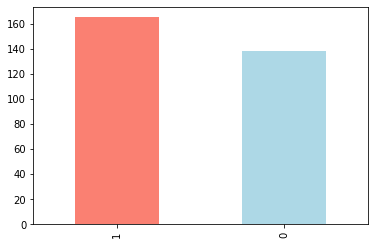

In [143]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [145]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [146]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [147]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

Comparing `target` column with `sex` column:

In [148]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


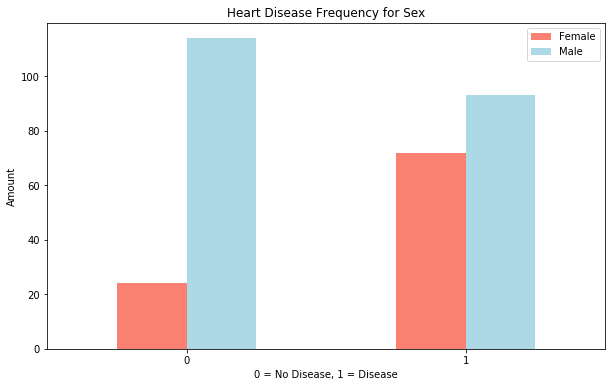

In [149]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

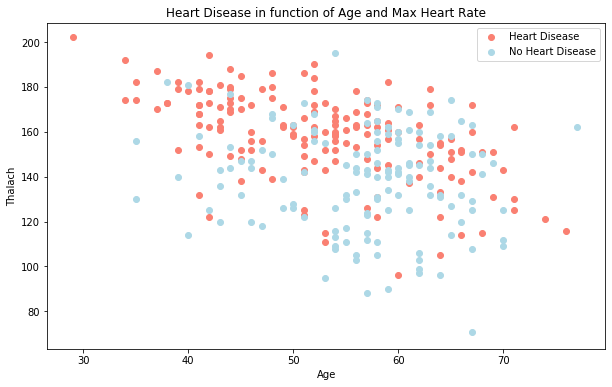

In [150]:
plt.figure(figsize=(10, 6))

# Positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c='salmon');

# Negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c='lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

### The distribution of the age column

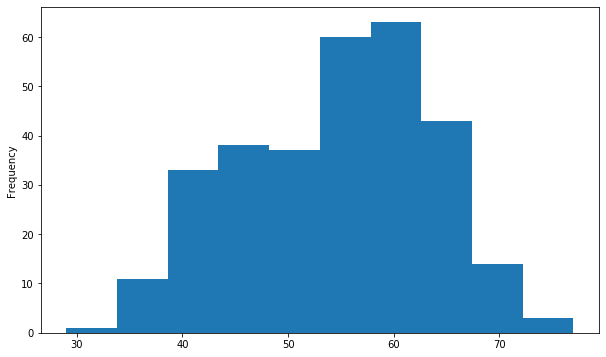

In [151]:
df.age.plot.hist(figsize=(10, 6));

### Heart Disease Frequency vs Chest Pain Type

**Remind:**
   * **cp:** chest pain type:
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

In [152]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


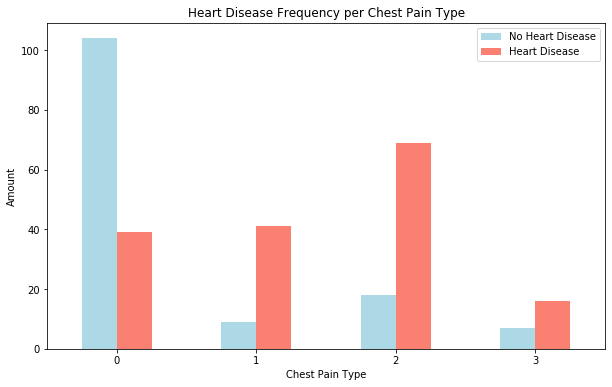

In [153]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['lightblue', 'salmon'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease']);

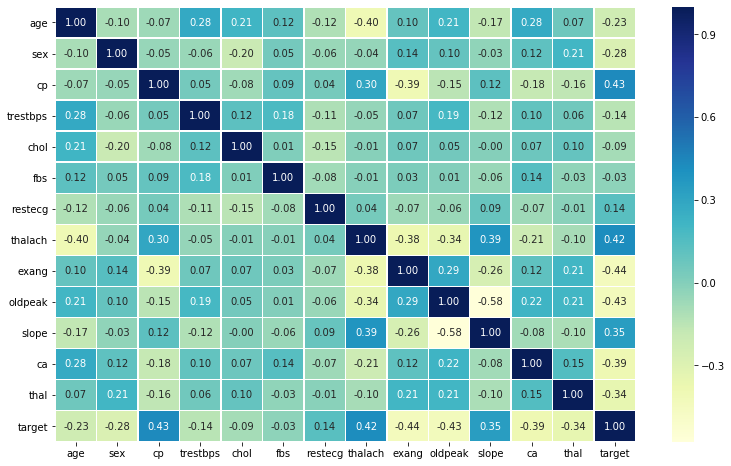

In [154]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(13, 8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 5. Modelling

In [155]:
x = df.drop('target', axis=1)
y = df['target']

In [156]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Here're 3 different machine learning models to test:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [157]:
models = {'LR': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    """
    Fits and evaluates given machine learning models. 
    models: a dict of different Scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores

In [158]:
model_scores = fit_and_score(models=models,
                             x_train=x_train, x_test=x_test,
                             y_train=y_train, y_test=y_test)

model_scores

/Users/tanyachabrova/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LR': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

In [159]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,LR,KNN,RFC
accuracy,0.885246,0.688525,0.836066


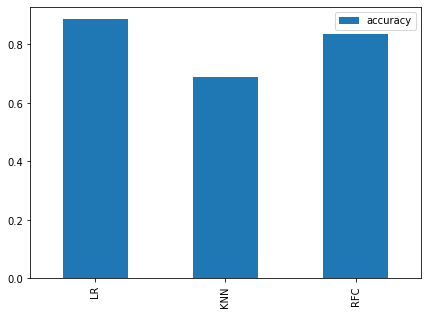

In [160]:
model_compare.T.plot.bar(figsize=(7, 5));

### Hyperparameter tuning KNN

In [161]:
train_scores, test_scores = [], []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

Maximum KNN score on the test data is 75.41%


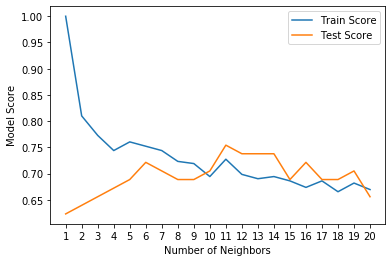

In [162]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.xticks(range(1, 21, 1))
plt.legend()

print(f'Maximum KNN score on the test data is {max(test_scores) * 100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

In [163]:
grid_LR = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear']}

grid_RFC = {'n_estimators': np.arange(10, 10000, 51),
            'max_depth': [None, 3, 6, 11],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}

In [164]:
# Tuning Logistic Regression

np.random.seed(42)

rs_LR = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=grid_LR,
                           cv=7,
                           n_iter=20,
                           verbose=True)

rs_LR.fit(x_train, y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [165]:
rs_LR.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [166]:
rs_LR.score(x_test, y_test)

0.8852459016393442

In [167]:
# Tuning Random Forest Classifier

np.random.seed(42)

rs_RFC = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=grid_RFC,
                            cv=7,
                            n_iter=25,
                            verbose=True)

rs_RFC.fit(x_train, y_train)

Fitting 7 folds for each of 25 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed: 16.5min finished


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [168]:
rs_RFC.best_params_

{'n_estimators': 367,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [122]:
rs_RFC.best_score_

0.8223289315726289

In [169]:
rs_RFC.score(x_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

In [180]:
# Tuning hyperparameters for Logistic Regression

np.random.seed(42)

grid_LR_2 = {'C': np.logspace(-5, 4, 50),
             'solver': ['liblinear', 'newton-cg'],
             'max_iter': [100, 500, 1000]}

gs_LR = GridSearchCV(LogisticRegression(),
                     param_grid=grid_LR_2,
                     cv=5,
                     verbose=True)

gs_LR.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   19.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 1.5...
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03, 1.00000000e+04]),
                         'max_iter': [

In [181]:
gs_LR.best_params_

{'C': 0.2559547922699538, 'max_iter': 100, 'solver': 'liblinear'}

In [182]:
gs_LR.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [185]:
# Making predictions with tuned model
y_preds = gs_LR.predict(x_test)

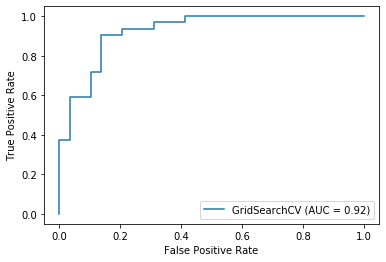

In [188]:
# Plotting ROC curve and calculating AUC metric
plot_roc_curve(gs_LR, x_test, y_test);

In [191]:
# Confusion matrix
conf_matr = pd.DataFrame(confusion_matrix(y_test, y_preds))
conf_matr

,0,1
0,25,4
1,3,29


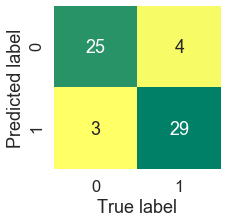

In [225]:
sns.set(font_scale=1.5)

def plot_conf_matrix(conf_matr):
    
    """
    Plots confusion metrics using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_matr, annot=True, cbar=False, cmap='summer_r')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_matrix(conf_matr)

In [226]:
# Classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross-validation

In [235]:
gs_LR.best_params_

{'C': 0.2559547922699538, 'max_iter': 100, 'solver': 'liblinear'}

In [236]:
clf = LogisticRegression(C=0.2559547922699538,
                         solver='liblinear',
                         max_iter=100)

In [237]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [239]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [242]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [244]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [245]:
# Cross-validated recall
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

## Visualizing cross-validated metrics

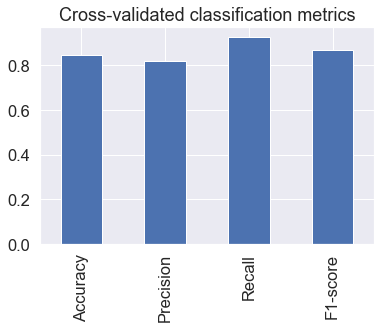

In [249]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1-score': cv_f1}, index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

## Feature Importance for Logistic Regression model

In [251]:
clf.fit(x_train, y_train);

In [253]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004055000141620459,
 'sex': -0.9351644643726031,
 'cp': 0.6847252010997142,
 'trestbps': -0.011645945403874623,
 'chol': -0.0017330692379390826,
 'fbs': 0.051778904684182336,
 'restecg': 0.3496272430030469,
 'thalach': 0.024834218300302763,
 'exang': -0.6497892334009532,
 'oldpeak': -0.580340619959161,
 'slope': 0.4854902207694182,
 'ca': -0.6616401425678404,
 'thal': -0.7143390549390238}

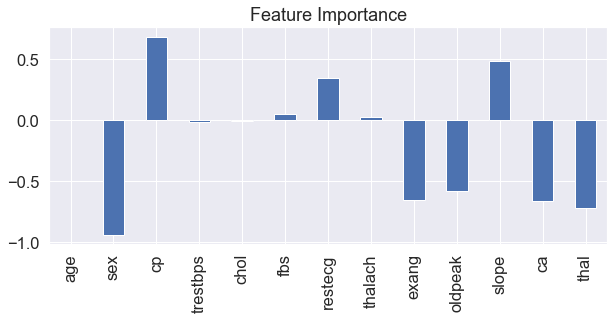

In [332]:
# Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False, figsize=(10, 4));

In [334]:
model_results = pd.DataFrame({'True': y_test.values,
                              'Predicted': y_preds})
model_results

,True,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0
